<a href="https://colab.research.google.com/github/rubyclaguna/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 


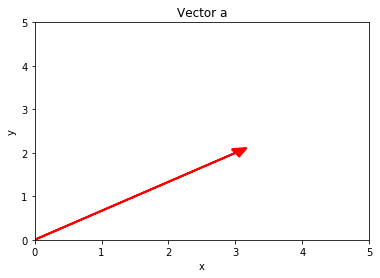

In [5]:
a = [3,2]

plt.arrow(0, 0, a[0], a[1], head_width=0.2, head_length=0.2,
          color='r', lw=2)
plt.xlim([0,5])
plt.ylim([0,5])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector a')

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [9]:
b = np.array([17, -4, -2, 1])
b = np.linalg.norm(b)

print(b)

17.60681686165901


*The norm represents the length of the vector.*

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [10]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

print("Dot product of vectors c & d:\n", np.dot(c,d))

Dot product of vectors c & d:
 42


No, they're not orthogonal. In order for these vectors to be orthogonal, or perpindicular, the dot product would have to be equal to zero. 

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [11]:
E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')

print("Inverse of E:\n", np.linalg.inv(E))
print("\n")
print("Transpose of E:\n", E.T)

Inverse of E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [12]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [14]:
print("Customers")
print('Mean:', np.mean(customers))
print('Variance:', np.var(customers))
print('Standard Deviation:',np.std(customers))

print("Snow")
print('Mean: ', np.mean(snow))
print('Variance: ', np.var(snow))
print('Standard Deviation: ',np.std(snow))

Customers
Mean: 1135.7142857142858
Variance: 84653.06122448981
Standard Deviation: 290.95199127087926
Snow
Mean:  2.7142857142857144
Variance:  7.346938775510203
Standard Deviation:  2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, they are not comparable since each variable is measured differently. In order for the variables to be comparabale they would have to be standarized to the same scale or unit of measure. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [15]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [22]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [23]:
#drop 'country' column - not numeric 
df2 = df.drop('Country', axis=1)
df2.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [27]:
#standarize df2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_s = pd.DataFrame(scaler.fit_transform(df2))

df_s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [31]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df_s)
pca_df = pd.DataFrame(pca.transform(df_s), columns=['PC 1', 'PC 2'])

pca_df.head()

,PC 1,PC 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [32]:
# Add country column
df_c = pd.concat([pca_df, df[['Country']]], axis = 1)
df_c.head()

,PC 1,PC 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


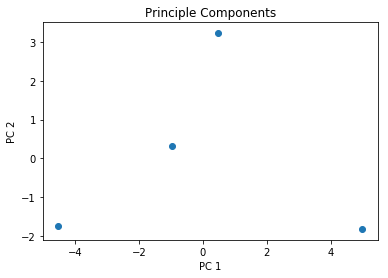

In [39]:
plt.title('Principle Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.scatter(pca_df['PC 1'], pca_df['PC 2'])
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [52]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


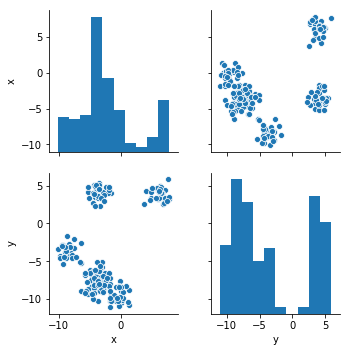

In [53]:
#pairplot to see if we can  spot any clustering 
import seaborn as sns
sns.pairplot(points)
plt.show()

In [0]:
# Graph elbow plot - k means clustering 
from sklearn.cluster import KMeans

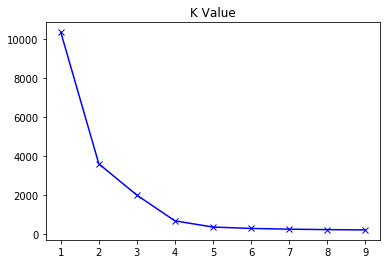

In [58]:
points2 = []
K= range(1,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    points2.append(km.inertia_)

plt.plot(K, points2, 'bx-')
plt.title('K Value')
plt.show()

The break is around 4. 

In [65]:
# Calculate the centroids
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

-2.32329816340267 -3.4228690080745237


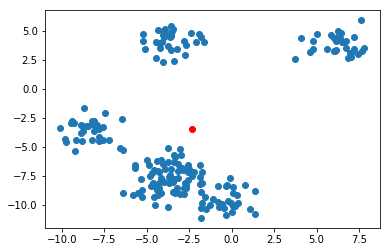

In [66]:
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

In [80]:
centroids = points.sample(4)
centroids.head()

,x,y
196,5.051216,4.745086
155,-4.072158,5.013310
51,-6.451010,-2.638382
185,-2.796932,-9.090069


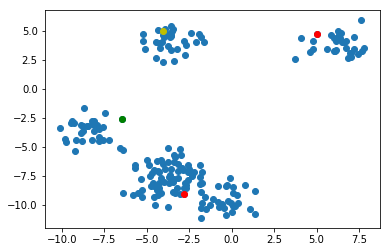

In [81]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "oy")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "og")
ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "or")
plt.show()

In [0]:
from scipy.spatial import distance
def find_nearest_centroid(df, centroids, iteration):
  distances = distance.cdist(df, centroids, 'euclidean')
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [85]:
df_cen = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
df_cen.head()

,x,y,cluster_1
0,-7.846803,-3.421277,2
1,-3.554323,-6.884729,3
2,-0.192822,-9.671030,3
3,-6.401456,-5.223972,2
4,-0.804026,-9.704457,3


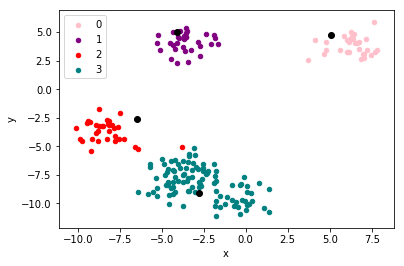

In [89]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'pink', 1:'purple', 2:'red', 3: 'teal'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(df_cen, 'cluster_1', centroids)